In [ ]:
#Suja Basnet
#Assignment 04
#Feature Selection Techniques
#Chi-Square test

In [ ]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Importing the dataset and storing data in X and target in y.


In [155]:
data = pd.read_csv("diabetes.csv")
X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]    #target column i.e outcome


In [156]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Selecting features with high Chi-square
We have used SelectKBest to select the features with best chi-square, we have passed two parameters one is the scoring metric that is chi2 and other is the value of K which signifies the number of features we want in final dataset.


In [157]:
#From dataset it will take the best 5 attributes with respect to output
bestfeatures = SelectKBest(score_func=chi2, k=5) 
fit = bestfeatures.fit(X,y)

We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. 



In [158]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [163]:
#concatenating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [164]:
#naming dataframe columns
featureScores.columns = ['Features','Score']  #naming the dataframe columns

## Printing all the Scores

In [165]:
featureScores

,Features,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


# Printing the top 5 best features
The highest the score the more important is the feature. All those values that are higher or lower are basically much more correlated with the output values. 

In [166]:
print(featureScores.nlargest(5,'Score'))

      Features        Score
4      Insulin  2175.565273
1      Glucose  1411.887041
7          Age   181.303689
5          BMI   127.669343
0  Pregnancies   111.519691


# Plotting the bar graph

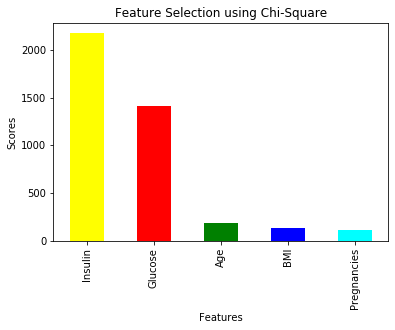

In [167]:
featureScores= pd.Series(fit.scores_, X.columns)
featureScores.nlargest(5).plot(kind='bar', color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.title("Feature Selection using Chi-Square")
plt.ylabel('Scores')
plt.xlabel('Features')
plt.show()